In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,"../") 
from codes.functions.check_policy import load_info
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
import seaborn as sns
import matplotlib.gridspec as gridspec
#matplotlib.use('module://ipykernel.pylab.backend_inline')
from cycler import cycler
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
import matplotlib
from cycler import cycler
from IPython.display import SVG 
import scipy
import pandas as pd



plt.style.use('seaborn') 
fontsize = 12

mpl_settings = {
    'text.usetex': False,
    'font.family': 'sans-serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/zeropoint/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Figure 5

In [9]:

%load_ext autoreload
%autoreload 2
%matplotlib inline

from stable_baselines import PPO2
from codes.environment.multichannel import SimpleCavityEnv
from stable_baselines.common.vec_env import SubprocVecEnv
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from codes.functions.check_policy import load_info
import os
import json
import zipfile
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
import os
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.dpi': 150})


warnings.simplefilter(action='ignore', category=FutureWarning)

def make_env(args, i):
    def _init():
        env = SimpleCavityEnv(args, counter=i,testing=True)
        return env
    return _init


def get_keras_model(filename, net):
    npz = np.load(filename, allow_pickle=True)
    keys = npz.files
    shapes=[]
    layers= []
    
    for item in keys:
        if "w:" in item  and net in item:
            shapes.append(npz[item].shape)
        if net in item and "logstd" not in item:
            layers.append(npz[item])
   




    model_keras=keras.Sequential()
    model_keras.add(keras.layers.Dense(shapes[0][1], input_shape=(shapes[0][0],)  )  )
    model_keras.add(keras.layers.Dense(shapes[1][1])  )

    model_keras.add(keras.layers.Dense(shapes[2][1] )  )
    #model_keras.add(keras.layers.Dense(shapes[2][1]  ))
    #     model_keras.add(keras.layers.Dense(1))

    # #model_keras.layers[0].set_weights([layers[0], layers[1]])    
    # # model.get_layer(layerName).set_weights(...)
    model_keras.set_weights(layers[:])
    return model_keras

comparison_RL = np.load("training/2020-10_optimal_alpha/comparison_RL_values.npy", allow_pickle=True)
comparison_analytical = np.load("training/2020-10_optimal_alpha/comparison_analytical_values.npy", allow_pickle=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
folder="training/2021-05-05_superpositions_bigger_longer/"
num_states1 = 4
num_states2 = 4
num_trainings = 7
num_init = -1

models=np.zeros((num_states1, num_states2, num_trainings), dtype=object)
models_keras=np.zeros((num_states1, num_states2, num_trainings), dtype=object)

for state1 in range(1, num_states1):
    for state2 in range(1, num_states2):
        for training in range(num_trainings):
            print(state1, state2)
            direc=folder+"/state_{0}_{1}_training_{2}".format(state1, state2, training)
            flag = False
            num = num_init
            while flag is False:
                try:
                    files = [x for x in os.listdir(direc+"/model") if ".zip" in x]
                    
                    last_model="rl_model_"+ str(sorted([int(x.split("_")[2]) for x in files])[num])+"_steps"
                    models[state1, state2, training]=PPO2.load(direc+"/model/"+last_model)
                    flag = True
                    print("Success")
                except:
                    num-=1
                    if num<-10:
                        print('Fail')
                        flag=True
                        

model_1_3 = PPO2.load("training/2021-05-14_1_3_different_phases_more_traj/state_1_3_training_0.0/model/rl_model_4392960_steps.zip")

1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 1
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 2
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Success
1 2
Loading a model without an environment, this model cannot be trained until i

In [11]:
def generate_obs(Nstates, N_obs_rho, X, Y, target):
    obs=np.zeros((N, N, 2 * N_obs_rho * N_obs_rho))
    for index1, x in enumerate(X):
        for index2, y in enumerate(Y):
            if x**2+y**2<1:
                state = ( x*qt.fock(Nstates, target-1)+
                          np.sqrt(1-x**2-y**2)*qt.fock(Nstates, target)+
                          y*qt.fock(Nstates, target+1)).unit()
                rho=state.proj().full()
                a = rho[:N_obs_rho,:N_obs_rho].flatten()
                obs[index1,index2] = np.concatenate((np.real(a), np.imag(a)), axis=None)
    return obs


N=300
max_value=1
N_obs_rho=20
num_actions = 6
Nstates=20

X = np.linspace(-max_value, max_value, N)
Y = np.linspace(-max_value, max_value, N)
extent = [X[0], X[-1], Y[0], Y[-1]]


actions = np.zeros((3, 3, num_trainings, N, N, num_actions))

obs1 = generate_obs(Nstates, N_obs_rho, X, Y, 2)
obs2 = generate_obs(Nstates, N_obs_rho, X, Y, 2)
obs3 = generate_obs(Nstates, N_obs_rho, X, Y, 2)

In [12]:
for training in range(num_trainings-1):
    print("Generating actions for models with target {}".format(2))
    actions[0, 0, training]=models[1, 1, training].predict(obs1.reshape(N*N, N_obs_rho*N_obs_rho*2), deterministic=True)[0].reshape(N,N,num_actions)
    actions[1, 1, training]=models[1, 3, training].predict(obs2.reshape(N*N, N_obs_rho*N_obs_rho*2), deterministic=True)[0].reshape(N,N,num_actions)
    actions[2, 2, training]=models[3, 3, training].predict(obs3.reshape(N*N, N_obs_rho*N_obs_rho*2), deterministic=True)[0].reshape(N,N,num_actions)
#actions[:, :, :, :, :, 2:] = np.ceil(actions[:, :, :, :, :, 2:]).clip(min=0)



actions_1_3=model_1_3.predict(obs1.reshape(N*N, N_obs_rho*N_obs_rho*2), deterministic=True)[0].reshape(N,N,num_actions)
#actions_1_3[:, :, 2:] = np.ceil(actions_1_3[:, :, 2:]).clip(min=0)


Generating actions for models with target 2
Generating actions for models with target 2
Generating actions for models with target 2
Generating actions for models with target 2
Generating actions for models with target 2
Generating actions for models with target 2


/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/ipykernel_launcher.py:146: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


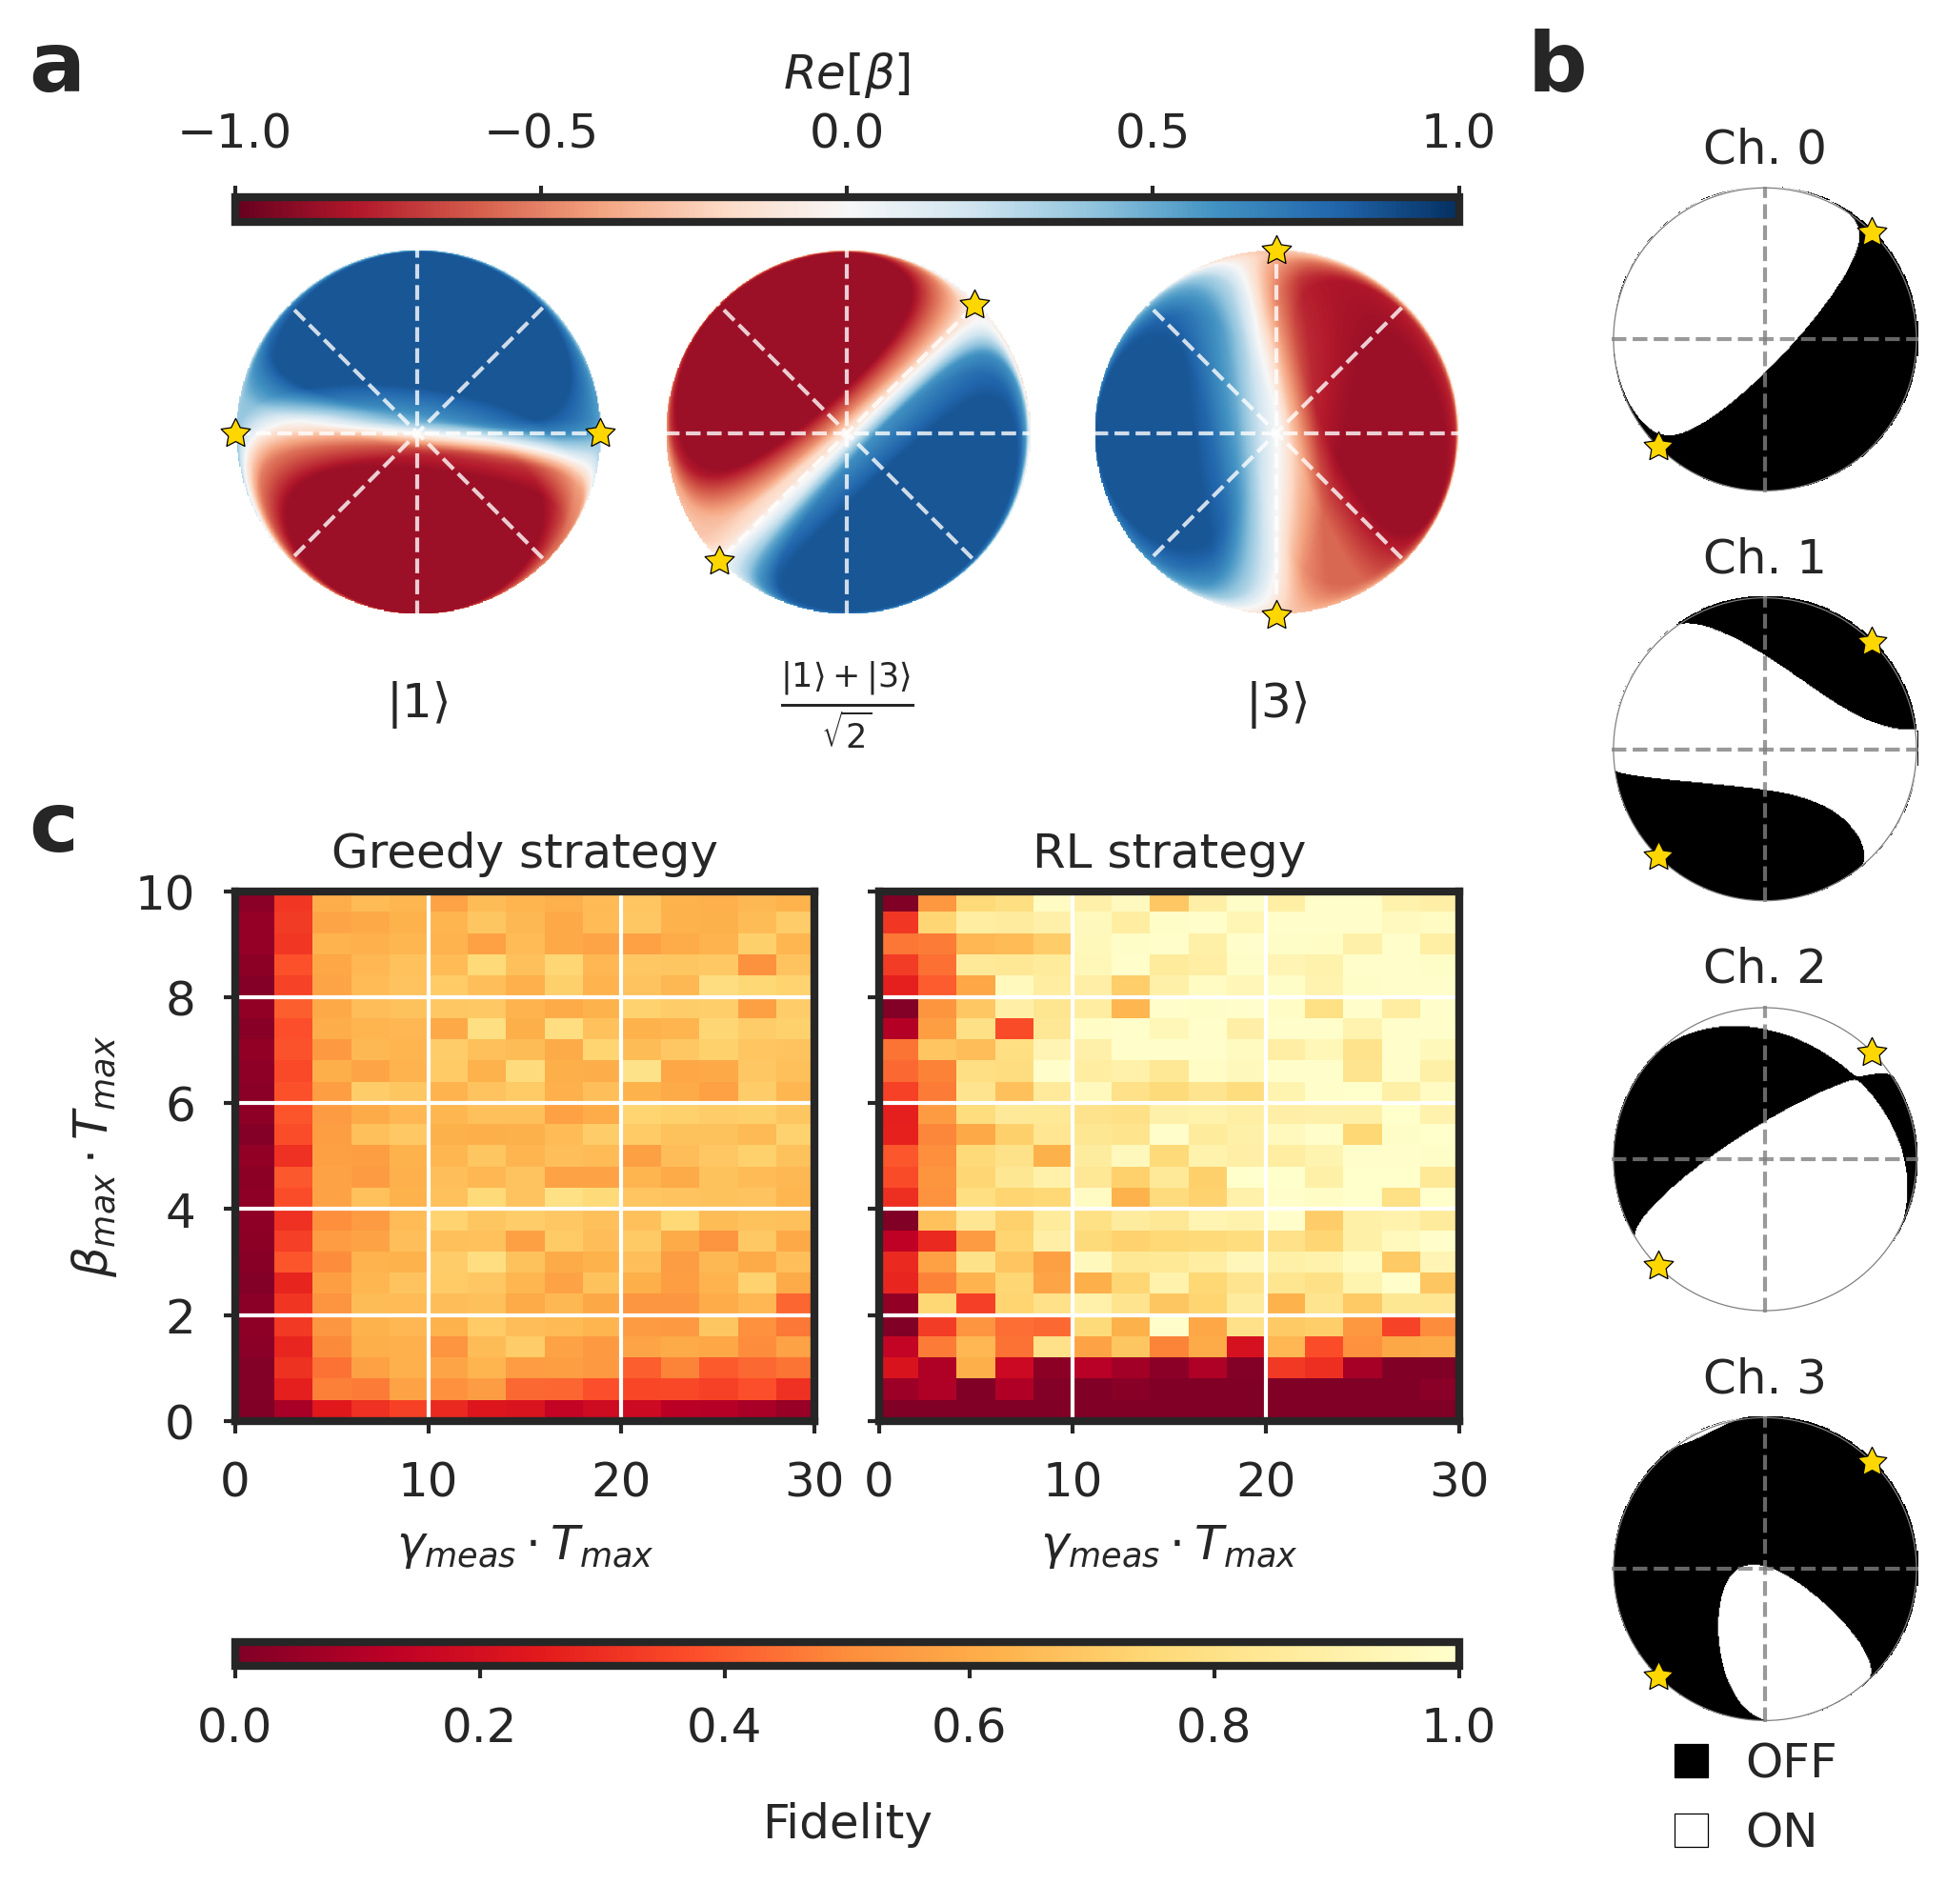

In [13]:
scale = 1.9

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask



plt.rcParams.update(mpl_settings)

fig = plt.figure(figsize=(4*scale, 4*scale), dpi=300)
main_grid = fig.add_gridspec(1, 2, width_ratios=[4,1])
timesteps_partial = 500

num_training = 0

gs1 = main_grid[0].subgridspec(11, 12, wspace=1.5)
gs2 = main_grid[1].subgridspec(4, 1, hspace=0)
# gs3 = main_grid[1].subgridspec(4, 1)

extent=(-1/np.sqrt(2), 1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2))
ax_actions = np.zeros(3, dtype=object)
states_text = [
    r"$|1\rangle$",
    r"$\frac{|1\rangle+|3\rangle}{\sqrt{2}}$",
    r"$|3\rangle$",
    
]
for j in range(3):
    ax_actions[j] = fig.add_subplot(gs1[:4, j*4:j*4+4])
    to_plot = actions[j, j, :, :, :, 0].mean(axis=0)
#     if i==1:
#         to_plot = actions_1_3[:, :, 0].mean(axis=0)
    w, h = to_plot.shape
    center = (int(w/2), int(h/2))
    radius = h/2
    mask = create_circular_mask(h, w, center=center, radius=radius)
    masked_img = to_plot.copy()
    masked_img[~mask] = np.nan
    im = ax_actions[j].imshow(masked_img,
                    vmin=-1, vmax=1, 
                    cmap="RdBu", 
                    origin="lower", 
                    aspect="equal",
                    extent=extent
                   )
    ax_actions[j].text(0, -1.1, states_text[j], horizontalalignment='center',)
    ax_actions[j].axis('off')
    ax_actions[j].tick_params(which='both', length=0)
    ax_actions[j].hlines(0, -1/np.sqrt(2), 1/np.sqrt(2), linestyle="dashed", color="white", lw=1, alpha=0.8)
    ax_actions[j].vlines(0, -1/np.sqrt(2), 1/np.sqrt(2), linestyle="dashed", color="white", lw=1, alpha=0.8)
    ax_actions[j].axline((-1/np.sqrt(2), -1/np.sqrt(2)), slope=1, linestyle="dashed", color="white", lw=1, alpha=0.8)
    ax_actions[j].axline((-1/np.sqrt(2), 1/np.sqrt(2)), slope=-1, linestyle="dashed", color="white", lw=1, alpha=0.8)
    if j>0:
        ax_actions[j].axes.yaxis.set_ticklabels([])
        
ax_actions[1].scatter(-1/np.sqrt(2)*0.7, -1/np.sqrt(2)*0.7,edgecolor='black', s=60, color="gold", marker=(5, 1), clip_on=False, zorder=8000)
ax_actions[1].scatter(1/np.sqrt(2)*0.7, 1/np.sqrt(2)*0.7,edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=False, zorder=8000)
ax_actions[0].scatter(1/np.sqrt(2),0,edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=False, zorder=8000)
ax_actions[0].scatter(-1/np.sqrt(2),0,edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=False, zorder=8000)
ax_actions[2].scatter(0,1/np.sqrt(2),edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=False, zorder=8000)
ax_actions[2].scatter(0,-1/np.sqrt(2),edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=False, zorder=8000)

cbar1 = fig.colorbar(im, ax=ax_actions,aspect=50, 
                    location="top", orientation="horizontal",
                   ticks=np.linspace(-1, 1, 5))        

ax_comparison = np.zeros(2, dtype=object)
ax_comparison[0] = fig.add_subplot(gs1[-6:, 0:6])
ax_comparison[1] = fig.add_subplot(gs1[-6:, 6:] )
ax_comparison[1].axes.yaxis.set_ticklabels([])
    
extent = (0, 30, 0, 10)
im=ax_comparison[0].imshow(comparison_analytical,
                origin="lower",
                extent=extent,
                vmax=1,aspect="auto",
                cmap="YlOrRd_r", 
                interpolation=None) 
im=ax_comparison[1].imshow(comparison_RL,
                origin="lower",
                extent=extent,
                vmax=1,aspect="auto",
                cmap="YlOrRd_r", 
                interpolation=None) 


#ax[1].set_ylabel(r"$T_{max}*max(\alpha)$")
ax_comparison[0].set_title("Greedy strategy")
ax_comparison[0].set_ylabel(r"$\beta_{max}\cdot T_{max}$")
ax_comparison[0].set_xlabel(r"$\gamma_{meas} \cdot T_{max}$")
ax_comparison[1].set_xlabel(r"$\gamma_{meas} \cdot T_{max}$")
ax_comparison[1].set_title("RL strategy")


cbar2 = fig.colorbar(im, ax=ax_comparison,pad=0.25, orientation="horizontal", aspect=50)

mpl_settings = {
    'grid.linestyle': "dashed",
    'grid.color': "gray"
}
plt.rcParams.update(mpl_settings)
ax_meas = np.zeros(4, dtype=object)
for j in range(4):
    ax_meas[j] = fig.add_subplot(gs2[j])
    ax_meas[j].set(xticks=[-1/np.sqrt(2), 0, 1/np.sqrt(2)], 
                      yticks=[-1/np.sqrt(2), 0, 1/np.sqrt(2)],
                     yticklabels=[r"$\frac{-1}{\sqrt{2}}$", 0, r"$\frac{1}{\sqrt{2}}$"],
                     xticklabels=[r"$\frac{-1}{\sqrt{2}}$", 0, r"$\frac{1}{\sqrt{2}}$"])
    ax_meas[j].set_title(f"Ch. {j}")
    ax_meas[j].xaxis.set_ticklabels([])
    ax_meas[j].yaxis.set_ticklabels([])
    ax_meas[j].axis('off')
    ax_meas[j].tick_params(which='both', length=0)
    ax_meas[j].hlines(0, -1/np.sqrt(2), 1/np.sqrt(2), linestyle="dashed", color="gray", lw=1, alpha=0.8)
    ax_meas[j].vlines(0, -1/np.sqrt(2), 1/np.sqrt(2), linestyle="dashed", color="gray", lw=1, alpha=0.8)
    extent=(-1/np.sqrt(2), 1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2))
    
    to_plot = np.ceil(actions_1_3[:, :, j+2]).clip(min=0)
    w, h = to_plot.shape
    center = (int(w/2), int(h/2))
    radius = h/2
    mask = create_circular_mask(h, w, center=center, radius=radius)
    masked_img = to_plot.copy()
    masked_img[~mask] = np.nan
    
    
    plt_last = ax_meas[j].imshow(masked_img,vmin=0, vmax=1, cmap="gray", extent=extent,aspect="equal", origin="lower")
    #ax_meas[j].grid(color='gray', linestyle='dashed', linewidth=10)
    
    circle1 = plt.Circle((0, 0), 1/np.sqrt(2)*0.99, color='gray', fill=False)
    ax_meas[j].add_patch(circle1)
    
    ax_meas[j].scatter(-1/np.sqrt(2)*0.7, -1/np.sqrt(2)*0.7,edgecolor='black', s=60, color="gold", marker=(5, 1), clip_on=True, zorder=8000)
    ax_meas[j].scatter(1/np.sqrt(2)*0.7, 1/np.sqrt(2)*0.7,edgecolor='black', s=60, color="gold",marker=(5, 1), clip_on=True, zorder=8000)
import matplotlib.patches as mpatches
black_patch = mpatches.Patch(color='black', edgecolor="black", label='OFF')
white_patch = mpatches.Patch(facecolor='white', edgecolor="black", label='ON')
ax_meas[-1].legend(handlelength=0.7, handles=[black_patch, white_patch], bbox_to_anchor=(0.8, 0), borderaxespad=0.)


cbar1.ax.set_title(r"$Re[\beta]$")
cbar2.ax.set_title(r"Fidelity",y=-8)

fonts = 21
fig.text(0.03, 0.9, "a",  fontweight='bold', fontsize=fonts)
fig.text(0.72, 0.9, "b",  fontweight='bold', fontsize=fonts)
fig.text(0.03, 0.55, "c",  fontweight='bold', fontsize=fonts)
fig.savefig("figure5.pdf", format = "pdf", dpi=300, bbox_inches='tight', pad_inches=0)